In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np



In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 146s 1us/step


In [3]:
# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
#build cnn model

/Users/sriyanshuazad/Desktop/prog/VI sem/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-16 00:39:21.925046: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-16 00:39:21.925239: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-16 00:39:21.925442: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-16 00:39:21.925744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-16 00:39:21.926187: I tensorflow/core/common_runtime/pluggable_device/pluggabl

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#compile model

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
#train model

Epoch 1/10


2025-04-16 00:40:01.386052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.3573 - loss: 1.7544 - val_accuracy: 0.5256 - val_loss: 1.3123
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5563 - loss: 1.2581 - val_accuracy: 0.5803 - val_loss: 1.1934
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5984 - loss: 1.1488 - val_accuracy: 0.5587 - val_loss: 1.2864
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5886 - loss: 1.2245 - val_accuracy: 0.5647 - val_loss: 1.4356
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5448 - loss: 1.5439 - val_accuracy: 0.5185 - val_loss: 2.1678
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5139 - loss: 2.5623 - val_accuracy: 0.4825 - val_loss: 4.5546
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4809 - loss: 5.8665 - val_accuracy: 0.4328 - val_loss: 12.8331
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4492 - loss: 16.

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
#evaluate model

313/313 - 1s - 4ms/step - accuracy: 0.3080 - loss: 589.8118
Test accuracy: 0.30799999833106995


In [15]:
def classify_custom_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(32, 32))  # Resize image to 32x32 pixels
    img_array = image.img_to_array(img)  # Convert image to array

    # Debug: Print the shape of the image array
    print(f"Image array shape: {img_array.shape}")
    
    # Add batch dimension (convert 32x32x3 -> 1x32x32x3)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image
    img_array = img_array / 255.0  # Scale the image pixel values to [0, 1]
    
    # Debug: Print the shape after adding the batch dimension
    print(f"Image array shape after expanding: {img_array.shape}")
    
    # Predict the image
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)  # Get the predicted class index
    return class_names[predicted_label]

Image array shape: (32, 32, 3)
Image array shape after expanding: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
The image is classified as: ship


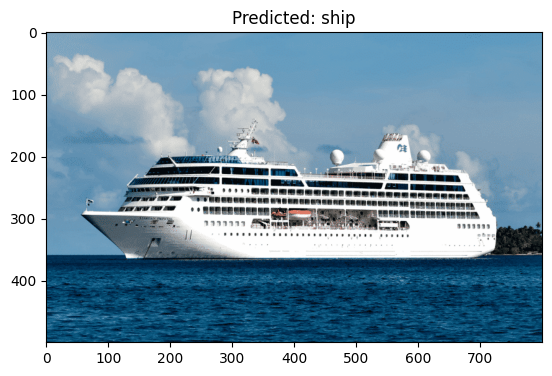

In [18]:
img_path = './Cruise-ships-1.png'  # Replace with the path to your image file
predicted_class = classify_custom_image(img_path)
print(f"The image is classified as: {predicted_class}")

# Optionally, display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.show()

Image array shape: (32, 32, 3)
Image array shape after expanding: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The image is classified as: airplane


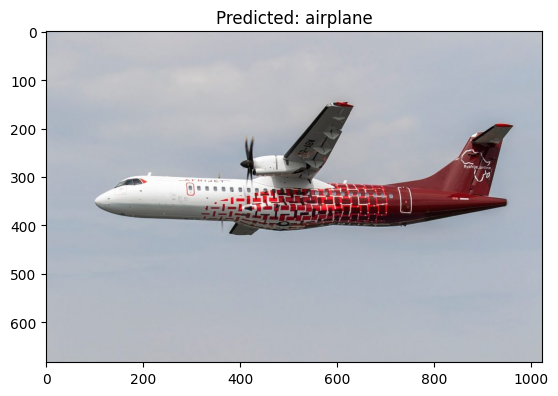

In [20]:
img_path = './plane.jpg'  # Replace with the path to your image file
predicted_class = classify_custom_image(img_path)
print(f"The image is classified as: {predicted_class}")

# Optionally, display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.show()